# Basic Elements II - a

Here we introduce the first dictionary and a function to be called

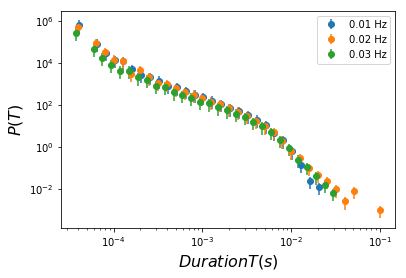

In [6]:
# Let's start we a revised and improved version of the little script we did so far 
# to plot a distribution of duration T
import os, sys
import numpy as np
import matplotlib.pylab as plt

# Put your main directory here, where there are the files to analyse
mainDir = "/home/gf/src/Python/Python-in-the-lab/Bk"

# Check if the directory exists
if not os.path.isdir(mainDir):
    print("Houston, we have a problem!")
    # Otherwise exit
    sys.exit()
    
# We then explicitly create a figure
fig = plt.figure()
# and add a plot
ax = fig.add_subplot(111)
# Because we are going to use errobar
# it is better to set the scale to log now
ax.set_xscale("log")
ax.set_yscale("log")

# Now we need to plot the three files 
# F64ac_0.0i_T.dat where i = [1,2,3]
# We could make a loop for "i" but it is not very pythonics
# Let's use glob

import glob # Check the documentation for its methods

# In particular glob1 finds files given a pattern in a directory
# * stands for any character: it does not work here, try yourself
# ? stands for a single character, which is what we need
filenames = sorted(glob.glob1(mainDir, "F64ac_0.0?_T.dat"))

for filename in filenames:
    # We need the full pathname to load the data
    fname = os.path.join(mainDir, filename)
    x, y = np.loadtxt(fname,unpack=True)
    # We need to get rid of the zeros
    # Let's make a boolean np.array
    # telling if the y is not zero
    is_not_zero = y!=0
    # Redefine x and y
    x, y = x[is_not_zero], y[is_not_zero]
    # Add a fake 
    yerr = y * 0.6
    # Extract the frequency to make a label
    # See what we use filename and not fname?
    material, freq, meas = filename.split("_")
    # Create the label
    lb = "{0} Hz".format(freq)
    ax.errorbar(x,y,yerr,fmt="o", label=lb)
ax.legend()
ax.set_xlabel("$Duration T (s)$", size=16)
ax.set_ylabel("$P(T)$", size=16); # Suppress the output

We have a little script that analyses some data (i.e. duration distributions), but there are  two other sets of data we are interested in. 

These are the size (S) and the energy (E) distributions. Can we plot them together?

Clearly writing three times the same code just to plot similar data is not very efficient and for sure not pythonic. Thus it seems very natural to create a FUNCTION that makes this job.

At the same time we need to pass to the function the information regarding the differences of the 3 distributions, so the fuction can plot them.

This is done with a dictionary

In [10]:
# Let's define a dictionary
distributions = dict()
# This works as well
distributions = {}

# A dictionary is an object charaterised by one or more keys
# It can contain any
distributions['Duration'] = ['T', 'Duration T (s)', r'$P(T)$']
distributions['Size'] = ['S', 'Size S (Wb)', r'$P(S)$']
distributions['Energy'] = ['E', 'Energy E (xx)', r'$P(E)$']

In [15]:
# Let us now define the function
# We add a comment to explain how to use it

def plot_dis(distribution_type):
    """
    This is my first comment
    This function plot a distribution of my choice
    Parameters:
    distribution_type: str
        The distribution you want to plot
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xscale("log")
    ax.set_yscale("log")

    # We extract the info from the dictionary 
    symb, xlabel, ylabel = distributions[distribution_type]

    filenames = sorted(glob.glob1(mainDir, "F64ac_0.0?_%s.dat" % symb))

    for filename in filenames:
        fname = os.path.join(mainDir, filename)
        x, y = np.loadtxt(fname, unpack=True)
        yerr = y * 0.6
        material, freq, meas = filename.split("_")
        freq = "%s Hz" % freq
        ax.errorbar(x,y,yerr,fmt='o', label=freq)
    ax.set_xlabel(xlabel, size=16)
    ax.set_ylabel(ylabel, size=16)
    ax.legend()
plt.show()

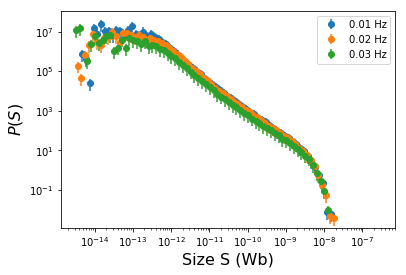

In [16]:
# Now we only need to call the function
plot_dis("Size")

The "distribution_type" value is needed in input to call the function. This is because it does not have any default value.

We can set the scale (lin/log), and give a default value.

Even better, we can tell the function to plot where we want. The reason will be clear soon... 

In [18]:
def plot_dis(distribution_type, scale='log', ax=None):
    """
    This is my first comment
    This function plot a distribution of my choice
    Parameters:
    distribution_type: str
        The distribution you want to plot
    scale : str
        Set the scale of the plot (lin/log)
    ax : obj
        A matplotlib axis to plot the data
    """
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)

    ax.set_xscale(scale)
    ax.set_yscale(scale)

    symb, xlabel, ylabel = distributions[distribution_type]

    filenames = sorted(glob.glob1(mainDir, "F64ac_0.0?_%s.dat" % symb))

    for filename in filenames:
        #filename = "F64ac_0.0%i_T.dat" % i # no????
        fname = os.path.join(mainDir, filename)
        x, y = np.loadtxt(fname, unpack=True)
        yerr = y * 0.6
        material, freq, meas = filename.split("_")
        freq = "%s Hz" % freq
        #ax.loglog(x,y,'o', label=freq)
        ax.errorbar(x,y,yerr,fmt='o', label=freq)
    ax.set_xlabel(xlabel, size=16)
    ax.set_ylabel(ylabel, size=16)
    ax.legend()
plt.show()

A function is better defined in a separated script. The main reason is that we can reuse it as many time we want.

Let us call the script *plot_distribution.py

Here is the final version

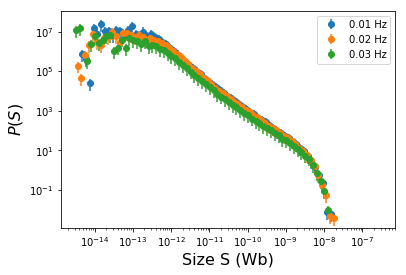

In [21]:
import os
import sys
import glob
import matplotlib.pylab as plt
import numpy as np

mainDir = "/home/gf/src/Python/Python-in-the-lab/Bk"


if not os.path.isdir(mainDir):
    print("Houston, we have a problem!")
    sys.exit()

# Let's define a dictionary
distributions = dict()
# This works as well
distributions = {}

distributions['Duration'] = ['T', 'Duration T (s)', r'$P(T)$']
distributions['Size'] = ['S', 'Size S (Wb)', r'$P(S)$']
distributions['Energy'] = ['E', 'Energy E (xx)', r'$P(E)$']

    
def plot_dis(distribution_type, scale='log', ax=None):
    """
    This is my first comment
    This function plot a distribution of my choice
    Parameters:
    distribution_type: str
        The distribution you want to plot
    """
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)

    ax.set_xscale(scale)
    ax.set_yscale(scale)

    symb, xlabel, ylabel = distributions[distribution_type]

    filenames = sorted(glob.glob1(mainDir, "F64ac_0.0?_%s.dat" % symb))

    for filename in filenames:
        #filename = "F64ac_0.0%i_T.dat" % i # no????
        fname = os.path.join(mainDir, filename)
        x, y = np.loadtxt(fname, unpack=True)
        yerr = y * 0.6
        material, freq, meas = filename.split("_")
        freq = "%s Hz" % freq
        #ax.loglog(x,y,'o', label=freq)
        ax.errorbar(x,y,yerr,fmt='o', label=freq)
    ax.set_xlabel(xlabel, size=16)
    ax.set_ylabel(ylabel, size=16)
    ax.legend()

if __name__ == "__main__":
    my_choice = "Size"
    plot_dis(distribution_type=my_choice)
    plt.show()

"__name__" is an internal variable. It is set to "__main__" when the script is run, when not when is called (using import) from another script.

It is a smart way to test your code

Now we want to use "plot_distribution.py" in another notebook. It is time to move to...

Py_lectures_02_basicElements_Dict_and_Func2.ipynb